In [1]:
#1. Load your dataset. 
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
file_path=r"C:\Users\afef.jebali\OneDrive - TUI\Desktop\Training Course\Exercice 01\CC GENERAL.csv"
df=pd.read_csv(file_path)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
# Drop non-numeric or non-essential columns
non_numeric_columns = ['CUST_ID']  # Update this list with non-numeric or non-essential columns
df_numeric = df.drop(non_numeric_columns, axis=1)

# Handle missing values with SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Select relevant features for clustering
selected_features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']

# Extract the selected features
selected_data = df_imputed[selected_features]

# Scale the selected features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # Assuming 3 clusters for example
kmeans.fit(scaled_data)
df['Cluster'] = kmeans.labels_

# Analyze the clusters and their characteristics
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_characteristics = pd.DataFrame(cluster_centers, columns=selected_features)
print(cluster_characteristics)



C:\Users\afef.jebali\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


       BALANCE    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0   916.517807   738.085634        407.259579              331.095813   
1  3756.124828  9269.487003       6138.196516             3133.381080   
2  5154.824032   673.718835        417.941837              255.833929   

   CASH_ADVANCE  
0    419.694400  
1    648.778916  
2   4619.425965  


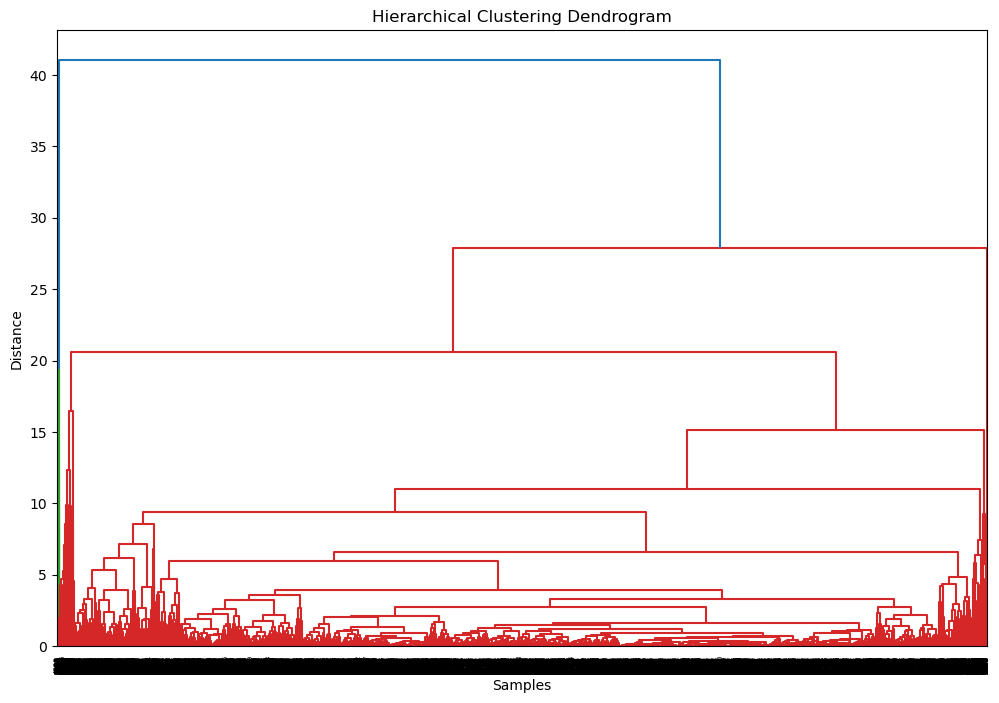

In [3]:
#2. Use hierarchical clustering to identify the inherent groupings within your data.
# Drop non-essential or non-numeric columns
non_numeric_columns = ['CUST_ID']  # Update this list with non-numeric or non-essential columns
df_numeric = df.drop(non_numeric_columns, axis=1)

# Handle missing values with SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Select relevant features for clustering
selected_features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']

# Extract the selected features
selected_data = df_imputed[selected_features]

# Scale the selected features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Perform hierarchical clustering
linked = linkage(scaled_data, method='complete', metric='euclidean')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


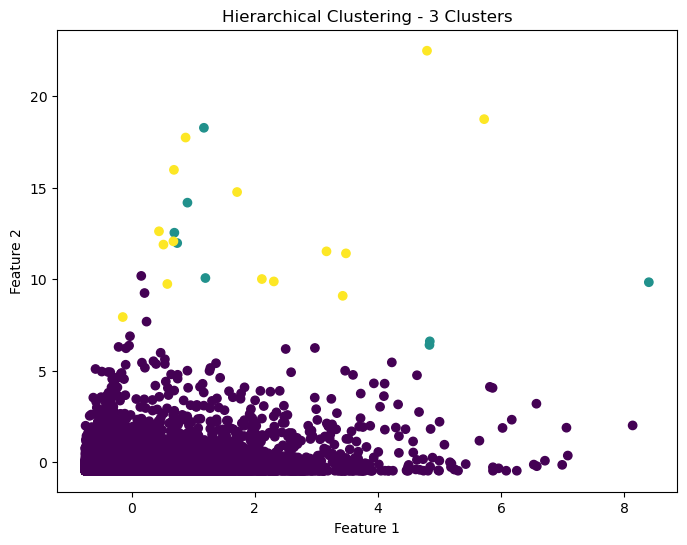

In [4]:
#3. Plot the clusters. 
import pandas as pd

import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\afef.jebali\OneDrive - TUI\Desktop\Training Course\Exercice 01\CC GENERAL.csv"
df = pd.read_csv(file_path)

# Drop non-essential or non-numeric columns
non_numeric_columns = ['CUST_ID']  # Update this list with non-numeric or non-essential columns
df_numeric = df.drop(non_numeric_columns, axis=1)

# Handle missing values with SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Select relevant features for clustering
selected_features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']

# Extract the selected features
selected_data = df_imputed[selected_features]

# Scale the selected features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Perform hierarchical clustering
linked = linkage(scaled_data, method='complete', metric='euclidean')

# Assign clusters based on the dendrogram and cut it into 3 clusters
clusters = fcluster(linked, 3, criterion='maxclust')

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.title('Hierarchical Clustering - 3 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


C:\Users\afef.jebali\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


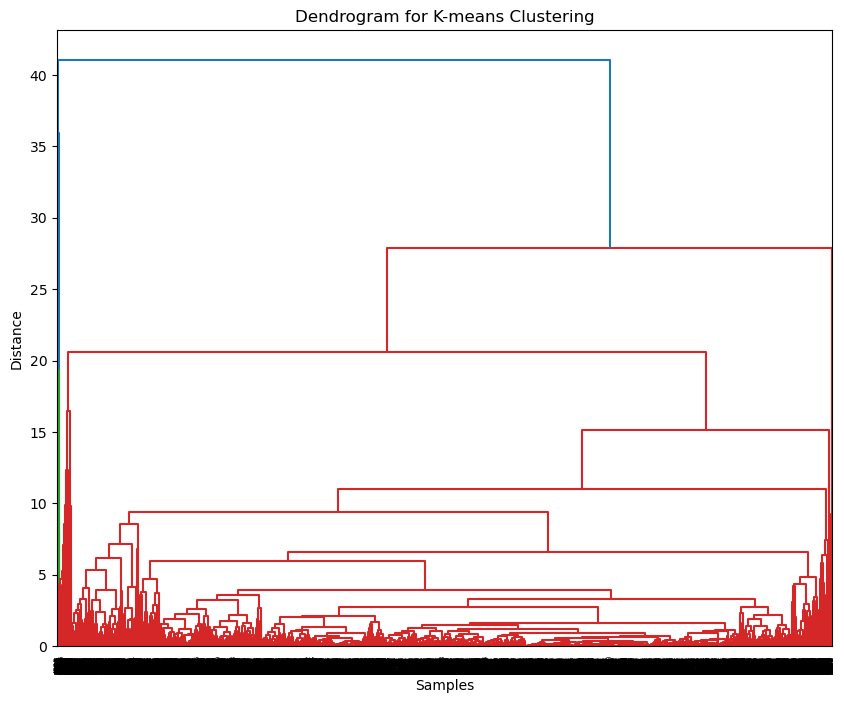

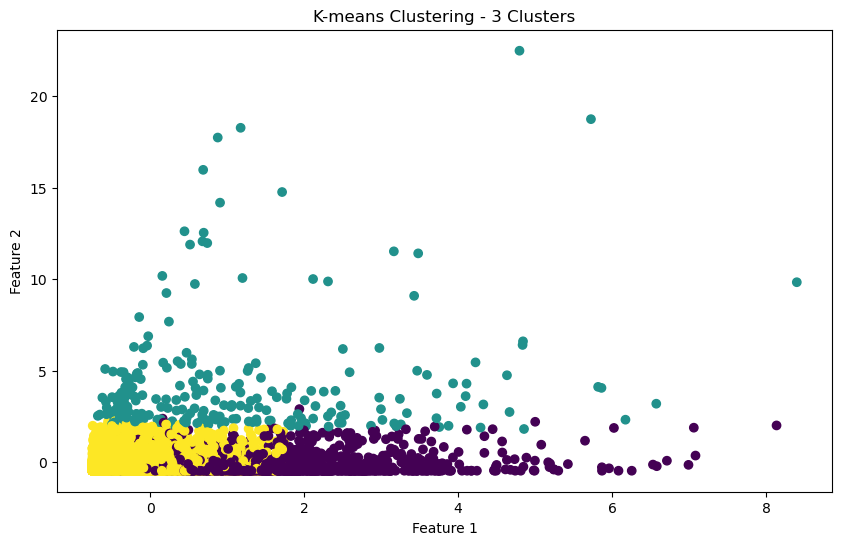

In [5]:
#4. Plot the dendrogram. Use K-means clustering. 
# Drop non-essential or non-numeric columns
non_numeric_columns = ['CUST_ID']  # Update this list with non-numeric or non-essential columns
df_numeric = df.drop(non_numeric_columns, axis=1)

# Handle missing values with SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Select relevant features for clustering
selected_features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']

# Extract the selected features
selected_data = df_imputed[selected_features]

# Scale the selected features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # Assuming 3 clusters for example
kmeans.fit(scaled_data)
clusters = kmeans.labels_

# Plot the dendrogram
linked = linkage(scaled_data, method='complete', metric='euclidean')
plt.figure(figsize=(10, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for K-means Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Plot the clusters from K-means
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.title('K-means Clustering - 3 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


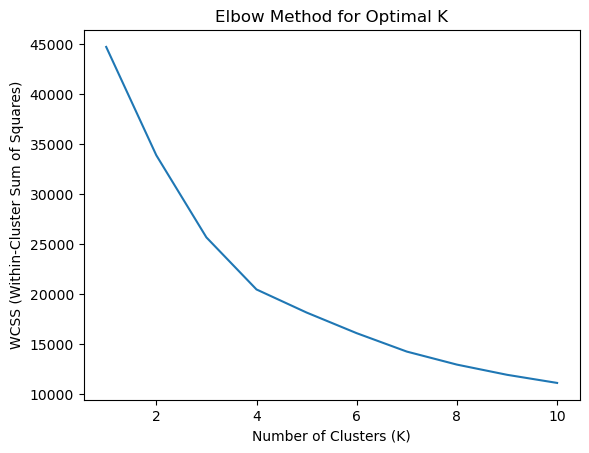

In [6]:
#5. Try different K values and select the best one. 
# Drop non-essential or non-numeric columns
non_numeric_columns = ['CUST_ID']  # Update this list with non-numeric or non-essential columns
df_numeric = df.drop(non_numeric_columns, axis=1)

# Handle missing values with SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Select relevant features for clustering
selected_features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']

# Extract the selected features
selected_data = df_imputed[selected_features]

# Scale the selected features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Elbow Method to find the best K value
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


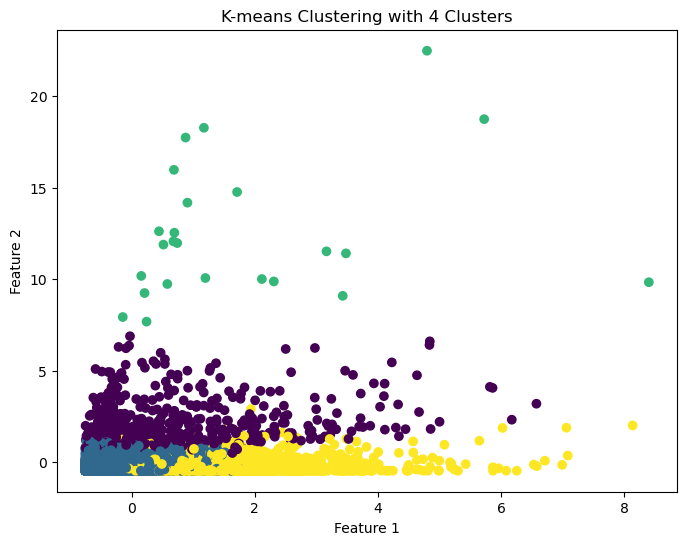

In [12]:
#6. Plot the clusters. 
optimal_k = 4  # Change this value to the obtained optimal K from the Elbow Method or another technique

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_data)
clusters = kmeans.labels_

# Plot the clusters from K-means with the optimal K
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.title(f'K-means Clustering with {optimal_k} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


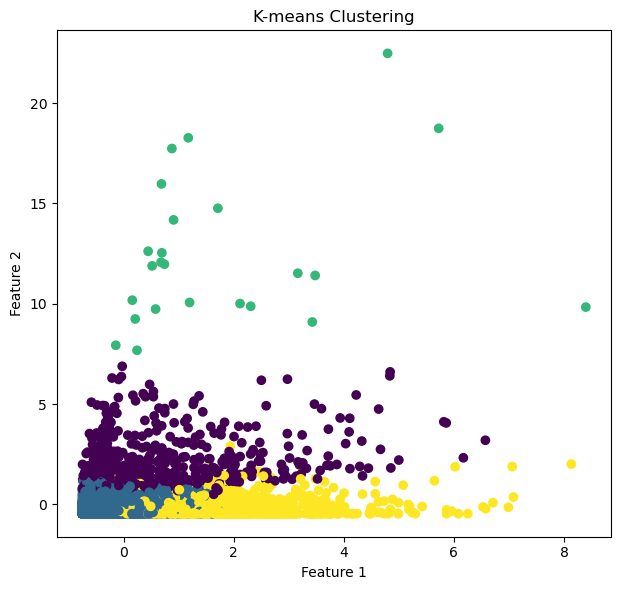

In [13]:
kmeans_labels = kmeans.labels_

# Plot the clusters obtained from K-means
plt.figure(figsize=(12, 6))

# Plot the K-means clusters
plt.subplot(1, 2, 1)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()



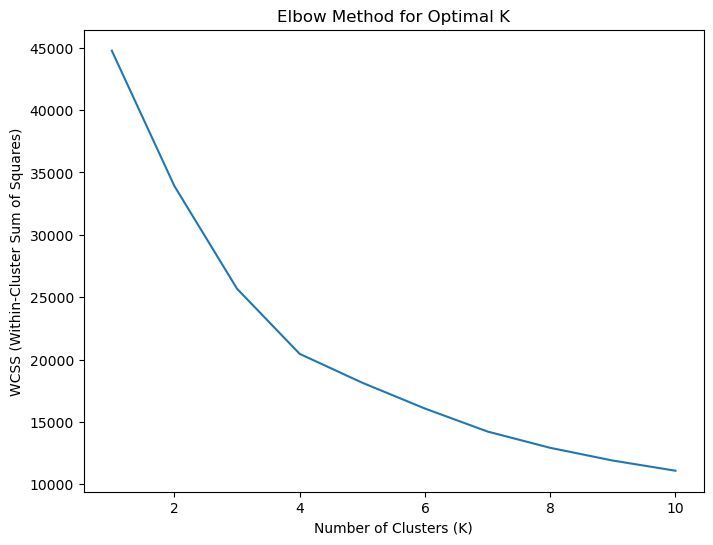

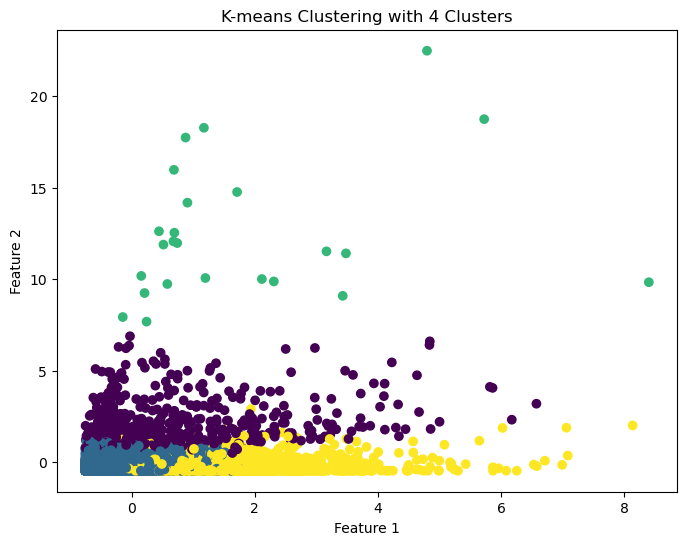

In [14]:
#7. Compare the two results.

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Perform K-means clustering to find the optimal K value
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method to find the optimal K
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Now, let's use the obtained optimal K from the Elbow Method
optimal_k = 4  # Change this value to your obtained optimal K

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_data)
clusters = kmeans.labels_

# Plot the clusters from K-means with the optimal K
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.title(f'K-means Clustering with {optimal_k} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [15]:
# In my opinion the Elbow Method is more starightforward and with the help of visual aid we can select the best "K" 

In [16]:
#Bonus: Search for another validation metric

from sklearn.metrics import davies_bouldin_score

# Assuming you have performed K-means clustering and have the cluster labels in 'clusters'

# Calculate Davies-Bouldin Index for K-means
db_index = davies_bouldin_score(scaled_data, clusters)
print(f"Davies-Bouldin Index for K-means: {db_index}")


Davies-Bouldin Index for K-means: 0.9547371495609052
